In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # train 과 test 나눔
from sklearn.linear_model import LogisticRegression

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
X = cancer.data
y = cancer.target

In [8]:
""""0의 개수, 1의 개수 확인"""
np.bincount(y)
#0은 212개, 1은 357개

array([212, 357], dtype=int64)

In [9]:
""""0은 악성, 1은 양성"""
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [12]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\NEORU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
print("훈련 점수 :",model.score(X_train, y_train))
print("테스트 점수 :",model.score(X_test, y_test))

훈련 점수 : 0.9553990610328639
테스트 점수 : 0.9440559440559441


In [17]:
pre = model.predict(X_test)

In [18]:
pre

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [19]:
np.bincount(pre)

array([ 39, 104], dtype=int64)

In [20]:
np.bincount(y_test)

array([45, 98], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix(pre, y_test)

array([[38,  1],
       [ 7, 97]], dtype=int64)

In [24]:
classification_report(y_test, pre)

'              precision    recall  f1-score   support\n\n           0       0.97      0.84      0.90        45\n           1       0.93      0.99      0.96        98\n\n    accuracy                           0.94       143\n   macro avg       0.95      0.92      0.93       143\nweighted avg       0.95      0.94      0.94       143\n'

In [25]:
from sklearn.metrics import roc_curve

In [29]:
fpr, tpr, _ = roc_curve(y_test, model.decision_function(X_test))

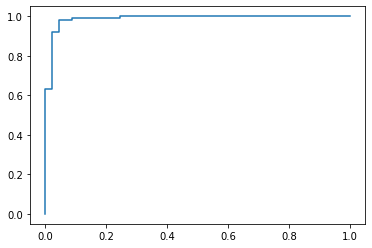

In [32]:
plt.plot(fpr, tpr)